### Building Simple Chatbot Using LangGraph

In [2]:
#importing libraries
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

#reducers
from typing import Annotated, List
from langgraph.graph.message import add_messages

In [3]:
#defining state schema
class State(TypedDict):
    messages: Annotated[List, add_messages]

In [6]:
#defining bot node

from langchain.chat_models import init_chat_model

model = init_chat_model(model="groq:llama-3.1-8b-instant")

def bot_model(state:State):
    return {"messages": model.invoke(state['messages'])}

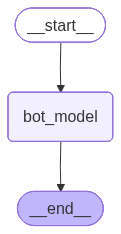

In [7]:
#stategraph, nodes and edges

graph = StateGraph(State)

graph.add_node("bot_model", bot_model)

graph.add_edge(START, "bot_model")
graph.add_edge("bot_model", END)

graph_builder = graph.compile()
graph_builder

In [19]:
#invoking graph_builder with messages
response = graph_builder.invoke({"messages": "say 2 lines about generative ai"})
print(response['messages'] )
   
                            


[HumanMessage(content='say 2 lines about generative ai', additional_kwargs={}, response_metadata={}, id='0c85accf-1823-4515-b405-b03223c34ede'), AIMessage(content='Generative AI refers to a subset of artificial intelligence that focuses on creating new, original content such as images, music, and text, rather than simply processing or analyzing existing data. This technology has the potential to revolutionize various industries, including art, design, music, and even entertainment, by enabling machines to generate unique and innovative creations.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 43, 'total_tokens': 112, 'completion_time': 0.091672698, 'completion_tokens_details': None, 'prompt_time': 0.002113579, 'prompt_tokens_details': None, 'queue_time': 0.050312501, 'total_time': 0.093786277}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs

In [ ]:
#streaming messages
#stream mode can be values to get all values, or updates to get only latest response
for event in graph_builder.stream({"messages":"Hello, I am Mounica"}, stream_mode="updates"):
    print(event)

{'bot_model': {'messages': AIMessage(content='Nice to meet you, Mounica. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 42, 'total_tokens': 67, 'completion_time': 0.024195463, 'completion_tokens_details': None, 'prompt_time': 0.002975604, 'prompt_tokens_details': None, 'queue_time': 0.051720406, 'total_time': 0.027171067}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b2d8d-59f5-7421-bf49-193f7edec32f-0', usage_metadata={'input_tokens': 42, 'output_tokens': 25, 'total_tokens': 67})}}
